PROFIL PAYS
==

In [1]:
import requests
from bs4 import BeautifulSoup 
import re
import pandas as pd
import numpy as np
import time

In [2]:
link = "https://agriculture.gouv.fr/les-politiques-agricoles-travers-le-monde"

In [3]:
def get_country_profile(link:str) -> list:
    
    import requests
    from bs4 import BeautifulSoup
    startTime = time.time()
    
    site = requests.get(link)
    
    if site.ok:
        drapeau = []
        pays = []
        info = []
        soup = BeautifulSoup(site.text,'lxml')
        tbody = soup.find('tbody')
        for first in tbody.find_all("tr",class_="row_even"):
            for c in first.find_all("figure"):
                try:
                    drap1 = c.find('img')
                    drapeau.append(drap1["src"])
                except Exception as e:
                    print(e)
            for c in first.find_all("a"):
                try:
                    name1 = (c.string if c else '')
                    pays.append(name1)
                    if c["href"].find('http://agriculture.gouv.fr') != -1:
                        lien1 = c["href"]
                    else:
                        lien1 = 'http://agriculture.gouv.fr'+ c["href"]
                    info.append(lien1)
                except Exception as e:
                    print(e)
        for second in tbody.find_all("tr",class_="row_odd"):
            for c in second.find_all("figure"):
                try:
                    drap2 = c.find('img')
                    drapeau.append(drap2["src"])
                except Exception as e:
                    print(e)
                
            for c in second.find_all("a"):
                try:
                    name2 = c.string
                    pays.append(name2)
                    if c["href"].find('http://agriculture.gouv.fr') != -1 or c["href"].find('https://agriculture.gouv.fr'):
                        lien2 = c["href"]
                    else:
                        lien2 = 'http://agriculture.gouv.fr'+ c["href"]
                    info.append(lien2)
                except Exception as e:
                    print(e)
    executionTime = (time.time() - startTime)
    print('Execution time in seconds: ' + str(executionTime))
    
    return pays,info,drapeau

In [4]:
country,info,symbol = get_country_profile(link)
info.remove("/sites/minagri/files/1506-ci-resinter-fi-angola.pdf")
country[42].replace(country[42],country[42].strip("\n\t").split(".")[0])

Execution time in seconds: 0.4872913360595703


' Canada'

In [5]:
for i,c in enumerate(country):
    print(i,c)

0 Afrique du Sud
1 Algérie
2 None
3 Angola
4 Japon
5 Kazakhstan
6 Kenya
7 Lettonie
8 Bénin
9 Birmanie
10 Brésil
11 Bulgarie
12 Mali
13 Maroc
14 Mexique
15 Mongolie
16 Corée du Sud
17 Côte d'Ivoire
18 Danemark
19 Egypte
20 Pologne
21 Portugal
22 Roumanie
23 Royaume-Uni
24 Grèce
25 Hongrie
26 Inde
27 Indonésie
28 Tunisie
29 Turquie
30 Ukraine
31 Vietnam
32 Arabie saoudite
33 Argentine
34 Australie
35 None
36 Autriche
37 Lituanie
38 Madagascar
39 Malaisie
40 Burkina Faso
41 Cameroun
42 
							 Canada.pdf (PDF, 282.45 Ko) 
43 Chine
44 Nigeria
45 Nouvelle-Zélande
46 Pays-Bas
47 Philippines
48 Espagne
49 États-Unis
50 Éthiopie
51 Ghana
52 Russie
53 Sénégal
54 Serbie
55 Suisse
56 Thaïlande
57 Irlande
58 Italie
59 Zambie


In [6]:
country[42].strip("\n\t").split(".")[0]

' Canada'

In [8]:
import time
startTime = time.time()
intrus = []
pdf_link = []
for c in info:
    try:
        obj = requests.get(c)
        if obj.ok:
            sp = BeautifulSoup(obj.text,'lxml')
            try:
                div = sp.find("div",class_="field field-name-body field-type-text-with-summary field-label-hidden")
                a = div.find("a")
                if a["href"].find('https://agriculture.gouv.fr') != -1 or a["href"].find('http://agriculture.gouv.fr') != -1:
                    lien = a["href"]
                else:
                    lien = 'https://agriculture.gouv.fr'+ a["href"]
                pdf_link.append(lien)
            except AttributeError:
                intrus.append(c)
                pass
            except TypeError:
                intrus.append(c)
                pass
    except Exception as e:
        intrus.append(c)
        pass
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Execution time in seconds: 23.00552201271057


In [15]:
len(country),len(info),len(symbol),len(pdf_link)

(60, 59, 59, 37)

In [14]:
print("Le total des lien incohérent: {}".format(len(intrus)))

Le total des lien incohérent: 3


In [1]:
import numpy as np

def r_math(dis,t):
    return -np.log(dis) / t

In [27]:
dis = 0.99**(90/90)
r_math(dis,1)

0.01005033585350145

In [31]:
s = np.array([97,98,99,100,101,102,103])
v_today = np.array([-30,-18,-8,0,6,10,12])
delta = np.array([13,11,9,7,5,3,1])
v_tom = np.array([-26,-14,-4,4,10,14,16])

In [32]:
new = [7 * (100 - c) for c in s]

In [38]:
x = new + v_tom

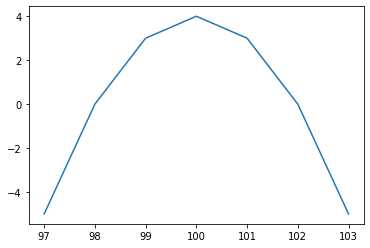

In [41]:
import matplotlib.pyplot as plt

plt.plot(s,x);